<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터터 분석에서서 자주 사용하는 문법 리뷰

벡터

행렬

In [3]:
import numpy as np
a =np.array([[1,2],[2,3]])
b =np.array([[5],[8]])
ar = np.linalg.inv(a) #역행렬(Inverse of a matrix)
answer = ar@b
answer

array([[1.],
       [2.]])

통계

In [4]:
heights = np.random.normal(174,10,size=10000)
import pandas as pd
hs = pd.Series(heights.round())
hs.value_counts()

173.0    416
175.0    416
178.0    412
177.0    403
172.0    394
        ... 
141.0      1
207.0      1
136.0      1
133.0      1
209.0      1
Length: 73, dtype: int64

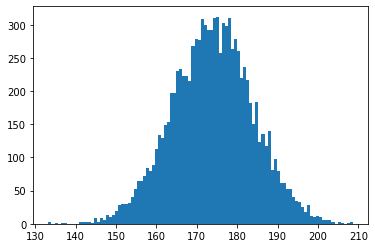

In [5]:
import matplotlib.pyplot as plt
plt.hist(heights,bins = 100)
plt.show()

확률

- 1~6까지 쓰여진 6면체의 주사위가 있다.(공평하지 않은 주사위)

1이 나올 확률이 1/6

2가 나올 확률이 1/12

3이 나올 확률이 1/12

4가 나올 확률이 1/3

5가 나올 확률이 1/6

6이 나올 확률이 1/6

- 주사위를 100번 던지는 실험을 해 보시오.


발생한 수가     0,1이면 주사위 1

발생한 수가       2이면 주사위 2

발생한 수가       3이면 주사위 3

발생한 수가 4,5,6,7이면 주사위 4

발생한 수가     8,9이면 주사위 5

발생한 수가   10,11이면 주사위 6


In [6]:
data = np.random.randint(0,12,1000) #0부터 11까지 1000개를 만든다.
cnts = np.zeros(6)
for tv in data:
  if tv == 0 or tv ==1:
    cnts[0]+=1
  elif tv ==2:
    cnts[1]+=1
  elif tv ==3:
    cnts[2]+=1
  elif tv ==2:
    cnts[1]+=1
  elif tv >=4 and tv <=7:
    cnts[3]+=1
  elif tv==8 or tv ==9:
    cnts[4] +=1
  else:
    cnts[5]+=1
cnts

array([156.,  75.,  82., 341., 181., 165.])

가설과 추론

현재는 2029년 Covid 이후에 전 세계에 새로운 전염병이 창권하였다.

그 이름도 무서운 eh

초기 감염률 0.001

sessac-medical에서 신약을 개발하여 발표하였는데

양성인지 음성인지 판별하였을때 정확도가 99%라고 한다.

해당 테스터는 유의미한 테스터인지 판별하시오.

선형회귀

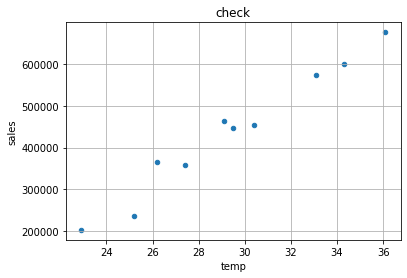

In [7]:
temperature = [25.2,27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.3,29.1]
sales = [236500,357500,203500,365200,446600,574200,453200,675400,598400,463100]
dict_data = {"temp":temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data,columns=["temp","sales"])
df_sales.plot.scatter(x='temp', y='sales',grid=True, title ="check")
plt.show()

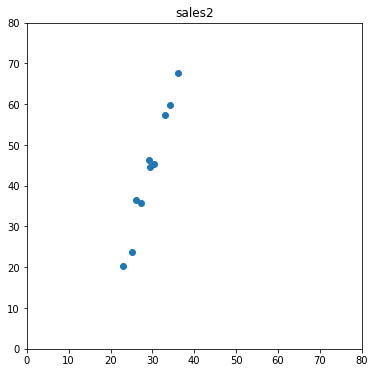

In [8]:
sales2 = np.array(sales)/10000
dict_data2 = {"temp":temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2,columns=["temp","sales2"])
plt.figure(figsize =(6,6))
plt.plot(temperature,sales2,'o')
plt.xlim(0,80) #0에서 80사이
plt.ylim(0,80)
plt.title("sales2")
plt.show()

y = ax + b

y = wx +b :머신러닝에서 표현하는 방식

w: 가중치- 독립변수 x가 결과 y에 영향을 주는 정도

b: 편향 - 주어진 인자 외에 결과 y에 영향을 주는 정도

y = 3x - 5 (eh)

y = 4x - 2 (eh2)

y = 5x - 3 (s c)

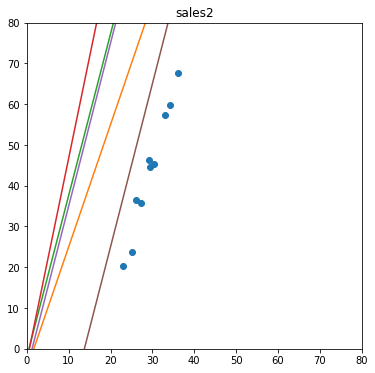

In [9]:
sales2 = np.array(sales)/10000
dict_data2 = {"temp":temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2,columns=["temp","sales2"])
plt.figure(figsize =(6,6))
plt.plot(temperature,sales2,'o')
plt.plot([0,80],[3*0-5, 3*80-5],'-',label ='y=3x-5') 
plt.plot([0,80],[4*0-2, 4*80-5],'-',label ='y=4x-2') 
plt.plot([0,80],[5*0-3, 5*80-5],'-',label ='y=5x-3') 
plt.plot([0,80],[4*0-5, 4*80-5],'-',label ='y=4x-5') 
plt.plot([0,80],[3.8*0-55, 4*80-55],'-',label ='y=3.4x-55') 
plt.xlim(0,80)
plt.ylim(0,80)
plt.title("sales2")
plt.show()

In [13]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
es5 = 0
for i, temp in enumerate(temperature):
  yp1 = 3*temp - 5 #예측값
  yp2 = 4*temp - 2 #예측값
  yp3 = 5*temp - 3 #예측값
  yp4 = 4*temp - 5 #예측값
  yp5 = 3.4*temp - 55 #예측값
  y = sales2[i]
  es1 += abs(yp1-y)
  es2 += abs(yp2-y)
  es3 += abs(yp3-y)
  es4 += abs(yp4-y)
  es5 += abs(yp5-y)
print(f"{es1:.2f},{es2:.2f},{es3:.2f},{es4:.2f},{es5:.2f}")

395.24,719.44,1003.64,689.44,22.54


In [12]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
es5 = 0
for i, temp in enumerate(temperature):
  yp1 = 3*temp - 5 #예측값
  yp2 = 4*temp - 2 #예측값
  yp3 = 5*temp - 3 #예측값
  yp4 = 4*temp - 5 #예측값
  yp5 = 3.4*temp - 55 #예측값
  y = sales2[i]
  es1 += (yp1-y)**2
  es2 += (yp2-y)**2
  es3 += (yp3-y)**2
  es4 += (yp4-y)**2
  es5 += (yp5-y)**2
print(f"{es1:09.2f}\n{es2:09.2f}\n{es3:09.2f}\n{es4:09.2f}\n{es5:09.2f}")

015739.03
051850.94
101110.49
047624.30
000085.97


In [ ]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
es5 = 0
for i, temp in enumerate(temperature):
  yp1 = 3*temp - 5 #예측값
  yp2 = 4*temp - 2 #예측값
  yp3 = 5*temp - 3 #예측값
  yp4 = 4*temp - 5 #예측값
  yp5 = 3.4*temp - 55 #예측값
  y = sales2[i]
  es1 += (yp1-y)**2
  es2 += (yp2-y)**2
  es3 += (yp3-y)**2
  es4 += (yp4-y)**2
  es5 += (yp5-y)**2
print(f"{es1:09.2f}\n{es2:09.2f}\n{es3:09.2f}\n{es4:09.2f}\n{es5:09.2f}")

로지스틱회귀

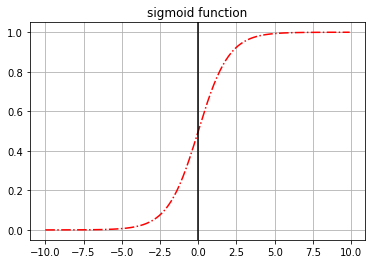

In [14]:
import math
def sigmoid(x): #logistic function or sigmoid function
    return math.exp(x)/(1+math.exp(x))

xs = [i/10 for i in range(-100,100,1)]
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys,'r-.')
plt.axvline(x=0,color='k')
plt.title("sigmoid function")
plt.grid(True)
plt.show()

KNN

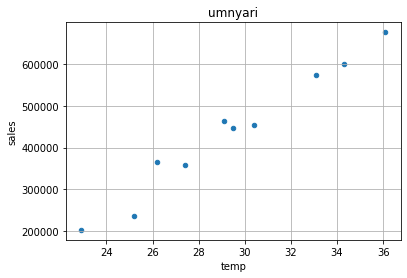

In [15]:
temperature = [25.2, 27.4, 22.9, 26.2, 29.5, 33.1, 30.4, 36.1, 34.3, 29.1]
sales = [236500,357500,203500, 365200,446600,574200,453200,675400,598400,463100]
dict_data = {"temp":temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data,columns=["temp","sales"])
df_sales.plot.scatter(x='temp',y="sales",grid=True,title="umnyari")

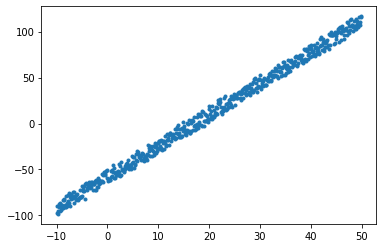

In [16]:
temps = np.array([temp/10 for temp in range(-100,500,1)])
sales = [3.4*temp-55+np.random.randint(np.random.randint(-12,-7),np.random.randint(3,8)) for temp in temps]
plt.plot(temps,sales,'.')
plt.show()

In [17]:
temp = 28
neighbors = [27.8, 27.9, 28, 28.1,28.2]
n_sales =np.zeros(5)
for j,neighbor in enumerate(neighbors):
  for i,stemp in enumerate(temps):
    if neighbor == stemp:
      n_sales[j] = sales[i]
n_sales.mean()

37.4

In [18]:
heights = np.random.normal(174,10,size=10000) #평균이 174, 표준편차가 10에 해당하는 정규 분포 데이터 10000개를 만들어 주세요.
heights.mean(),heights.std()

heights2 = heights-heights.mean()
heights2.mean(),heights2.std()

height3 = heights2/heights2.std()
height3.mean(),height3.std()

(-1.874411736935144e-15, 1.0)

KMeans

의사결정트리

퍼셉트론

TFIDF